In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Home_data train.csv')
df.head()
df.info()

In [ ]:
print(df.describe)

print(df.shape)

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour 

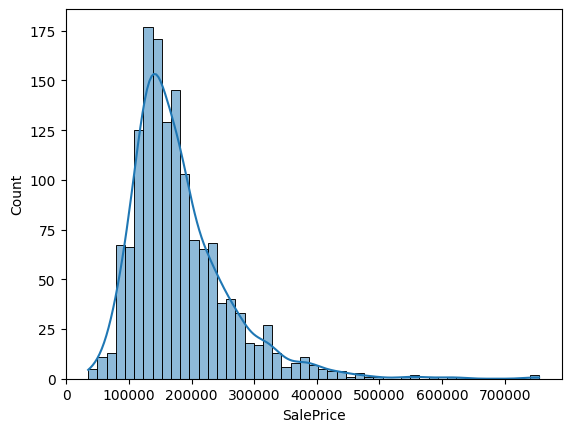

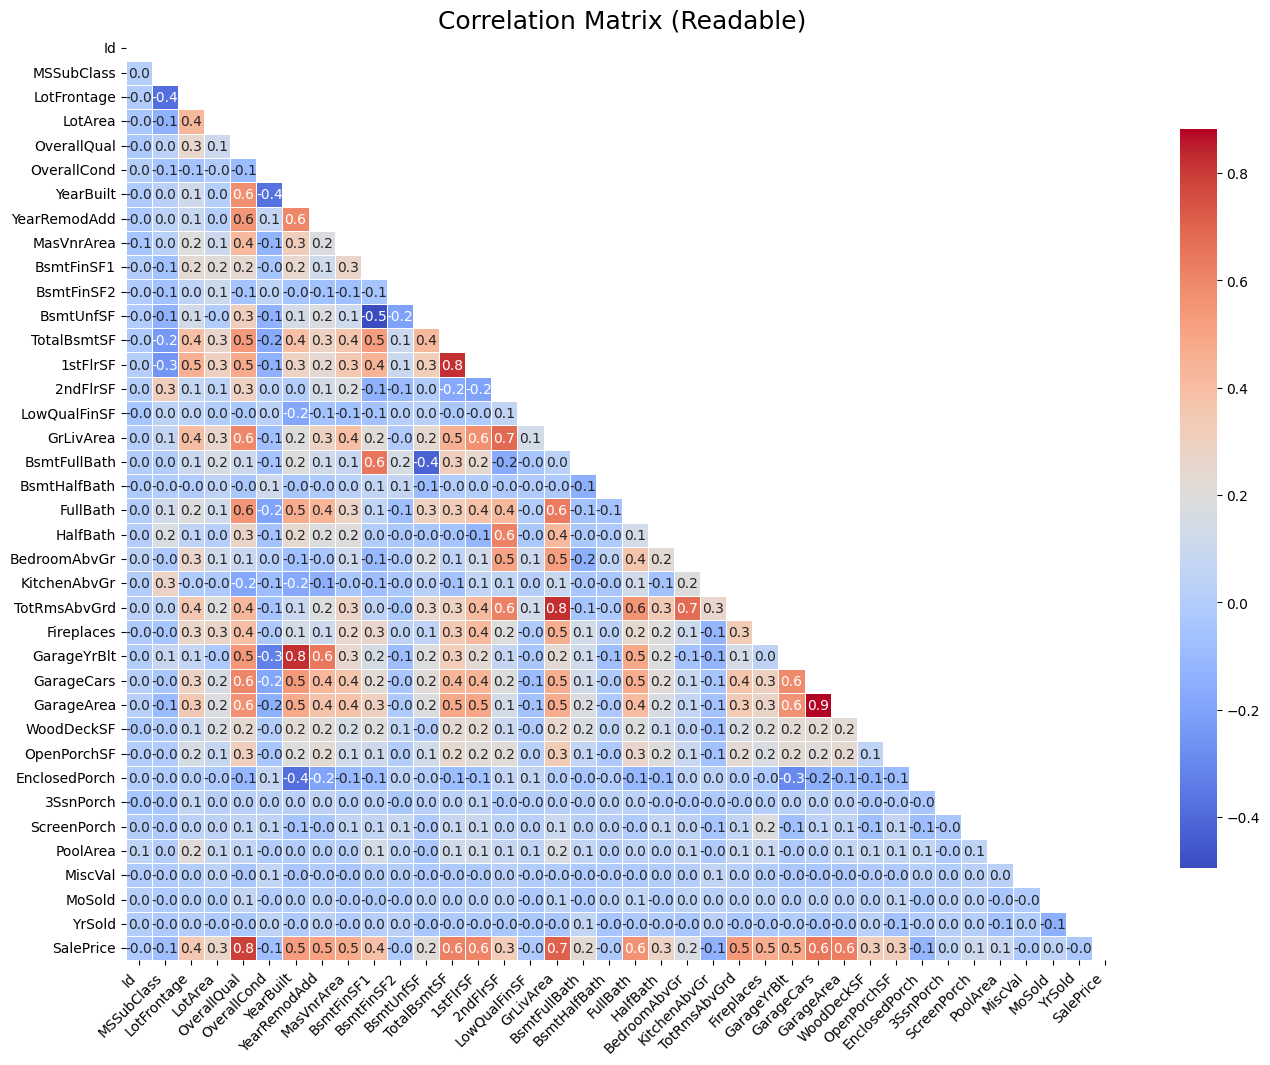

In [ ]:
# Plot the distribution of the target variable (SalePrice)
sns.histplot(df['SalePrice'], kde=True)
plt.show()

import numpy as np

# Compute the correlation matrix
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure with a larger size
plt.figure(figsize=(16, 12))  # Increased figure size for better readability

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.1f', cmap='coolwarm', 
            cbar_kws={'shrink': 0.8}, linewidths=0.5)

plt.title('Correlation Matrix (Readable)', fontsize=18)  # Increased title font size
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.show()

In [ ]:
# Fill missing values for numeric columns only
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Encode categorical variables (if any)
df = pd.get_dummies(df, drop_first=True)

# Separate features and target variable
X = df.drop('SalePrice', axis=1)  # Use correct column name 'SalePrice'
y = df['SalePrice']

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (1168, 245)
Testing set shape: (292, 245)


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define models (ensure all are regression models)
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} Mean Squared Error: {mse:.2f}")
    print(f"{name} R² Score: {r2:.4f}")
    print("-" * 50)


Random Forest Mean Squared Error: 842112968.89
Random Forest R² Score: 0.8902
--------------------------------------------------
Gradient Boosting Mean Squared Error: 784467828.05
Gradient Boosting R² Score: 0.8977
--------------------------------------------------
XGBRegressor Mean Squared Error: 787571136.00
XGBRegressor R² Score: 0.8973
--------------------------------------------------


In [ ]:
param_grid = {
    "n_estimators": [100, 200, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10]
}

grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_gbm = grid.best_estimator_
y_pred_gbm = best_gbm.predict(X_test)

print("Best Gradient Boosting Params:", grid.best_params_)
print("Gradient Boosting R² Score:", r2_score(y_test, y_pred_gbm))
print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gbm)))
print("-" * 50)
